In [2]:
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [42]:
path = "../data/ex1data1.txt"  
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])  
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Create 2D visualisation. Seaborn regplot does a linear fit to scatter data.

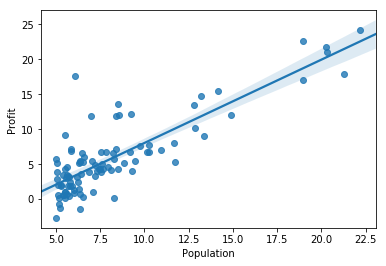

In [4]:
sns.regplot(data=data, x='Population', y='Profit');

# Linear regression: 

An approach to modeling the relationship between a dependent variable and one or more independent variables (if there's one independent variable then it's called simple linear regression, and if there's more than one independent variable then it's called multiple linear regression). 

The formulation of the linear regression is shown in the next figure.

![alt text](linearregressionformulation.jpeg "Title")


based on the formulation described above, we need to insert a column of '1s' at the beginning of the data frame as the form the \theta_{0}

In [43]:
data.insert(0, 'Ones', 1)

Define the features matrix X and the target y:

In [44]:
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols]
X = np.matrix(X.values)  
y = np.matrix(y.values) 

Now define the initil matrix of Theta parameters that will be optimised:

In [45]:
 theta = np.matrix(np.array([0,0]))  

# Cost function: 
The cost function evaluates the quality of our model by calculating the error between our model's prediction for a data point, using the model parameters theta, and the actual data point. 

This is the formulation for our particular model:

![alt text](O752N.png "Title")


using numpy matrix operation functions, we can compute the cost function as following:

In [15]:
def computeCost(X, y, theta):  
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

Note theta and X are matrices, and y is a vector:

In [47]:
X.shape, theta.shape, y.shape  


((97, 2), (1, 2), (97, 1))

With our parameters initialised at 0, this is 

In [48]:
computeCost(X,y,theta)

32.072733877455676

# Gradient descent: 

Now we need to define a function to perform gradient descent on the parameters theta using the update rules as follow

![alt text](HqqWT.png "Title")


In [20]:
def gradientDescent(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    


    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            # term is 1 for theta0 and x1 for theta1, and is multiplied in vectorial from to the error computed before
            term = np.multiply(error, X[:,j])
            
            #this is the formula seen in the previous cell
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        #compute cost after each iteration
        cost[i] = computeCost(X, y, theta)

    return theta, cost

In [68]:
alpha = 0.01  
iters = 10000

# perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)  

print g
print cost[-1]

[[-3.89578082  1.19303364]]
4.476971375975179


# Multivariable regression:


In [7]:
path = "../data/ex1data2.txt"  
data_multi = pd.read_csv(path, header=None,names=['Size', 'Bedrooms', 'Price'])  
data_multi.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Notice that the scale of the values for each variable is vastly different.To fix this, we need to do "feature normalization". 

In [8]:
data_multi = (data_multi - data_multi.mean()) / data_multi.std()  
data_multi.head() 

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


adding X0=1 values to the dataframe and defining features and targets.

In [9]:
data_multi.insert(0, 'Ones', 1)

In [17]:
cols_multi = data_multi.shape[1]  
X_multi = data_multi.iloc[:,0:cols_multi-1]  
y_multi = data_multi.iloc[:,cols_multi-1:cols_multi]
X_multi = np.matrix(X_multi.values)  
y_multi = np.matrix(y_multi.values) 
theta_multi = np.matrix(np.array([0,0,0]))  

compute cost with params initialised at 0.

In [18]:
computeCost(X_multi,y_multi,theta_multi)

0.48936170212765967

now performing the proper minimisation:

In [24]:
alpha = 0.01  
iters = 100000

# perform linear regression on the data set
g_multi, cost_multi = gradientDescent(X_multi, y_multi, theta_multi, alpha, iters)

# get the cost (error) of the model
computeCost(X_multi, y_multi, g_multi)  

0.130686480539042